<a href="https://colab.research.google.com/github/StrugglingProgrammer44/Programming-1/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction
Home advantage is fought for throughout many professional sports organizations. This means that each team ends in a certain rsnking based upon how many games they have won or lost that year. When the playoff teams are set at the end of the year and the playoffs begin, the higher ranked teams will have either more games at their home stadium or the only game will be there. This is said to have huge impacts on the outcome of many games in history, but what makes where the game happens so important?

Many factors are involved when teams come together and although a team may lose a game at an away stadium, is that the cause of it or is that just a coincidence because any team has a chance to win? This is a big topic within sports as it can influence sports betting, team locations, and much more. Factors such as home town fans, less traveling to and from the stadium, and knowledge of the stadium are key to the advantages for the home team.




##Research Question and Data
I am researching past professional sports playoffs to determine if home advantage is as big of a factor as it seems to be. My main question is, do teams with home advantage have a better history of being victorious?

This can help with team strategies when coming close to playoff time by knowing how important it is to earn that home advantage or if they should wait until playoff time to fully give their efforts instead of wasting useful energy before. This can also be a factor in sports betting so gamblers don't change their decision on a game due to home advantage if it is not as important as we had thought.

I am using data from a csv file that will be imported from github named game.csv in NHL Game Data:

(https://www.kaggle.com/code/kerneler/starter-nhl-game-data-72c5148f-5/data?select=game.csv)

##Approach
I am using National Hockey League data to find how many games are won at home in playoffs and if these games were won due to being at home. I am going to take this data and check for how many goals the home team had versus the away team and check for other factors that may have caused the outcome more than the location of the game. Lastly, I will compare the games in the regular season versus the playoffs to see if there is more of an advantage at home during the playoffs.

# **Project**

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/StrugglingProgrammer44/Programming-1/main/game%203.csv")

#making a copy just incase
df_copy = df

#adjusting column names
df.columns = ['game', 'season', 'type', 'date', 'time', 'away', 'home', 'away_goals', 'home_goals', 'outcome', 'starting', 'venue', 'link', 'location', 'offset', 'timezone']

#checking dimensions of the data
print("The dimesnions of the data are: ", df.shape)

#beginning of the data
df.head()

The dimesnions of the data are:  (11434, 16)


,game,season,type,date,time,away,home,away_goals,home_goals,outcome,starting,venue,link,location,offset,timezone
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [122]:
#checking for empty data
df.isna().sum()

game            0
season          0
type            0
date            0
time            0
away            0
home            0
away_goals      0
home_goals      0
outcome         0
starting      294
venue           0
link            0
location        0
offset          0
timezone        0
dtype: int64

In [123]:
#checking for unique values
df.nunique()

game          11434
season            9
type              2
date           1923
time           7156
away             33
home             33
away_goals       11
home_goals       11
outcome           6
starting          2
venue            82
link             29
location         11
offset            5
timezone          8
dtype: int64

In [124]:
#converting all necessary data to numeric data
df[['game', 'season', 'away', 'home', 'away_goals', 'home_goals']] = \
  df[['game', 'season', 'away', 'home', 'away_goals', 'home_goals']].apply(pd.to_numeric)

df.head()

,game,season,type,date,time,away,home,away_goals,home_goals,outcome,starting,venue,link,location,offset,timezone
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [142]:
!pip install pandas_profiling --upgrade

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

#error cannot get report

Based on the information below I am gathering the data from the wins and losses depending on if the winner was at home or away and how they won.

In [144]:
#Checking categorical data
#outputting the individual parts

print(df['outcome'].value_counts())

home win REG    4857
away win REG    3881
home win OT      791
away win OT      734
away win SO      591
home win SO      580
Name: outcome, dtype: int64


The next set of information is going to be the amount of goals for the home teams and the amount of goals for away teams.

In [152]:
#amount of goals at home
print(df['home_goals'].value_counts())

3     2516
2     2457
4     2009
1     1749
5     1219
0      683
6      542
7      190
8       55
9       10
10       4
Name: home_goals, dtype: int64


In [153]:
#amount of goals away
print(df['away_goals'].value_counts())

2     2714
3     2508
1     2088
4     1855
5      940
0      823
6      339
7      136
8       22
9        7
10       2
Name: away_goals, dtype: int64


So far from the data I have gathered I am able to conclude a couple things. I was first able to check the amount of seasons accounted for in the data. There were 9 seasons that were taken from which is a large serving size so the data is reliable. Also, I concluded that home teams had many less games than away teams where they did not score a single goal. This shows that home advantage seems to be true at first.

Next I am going to plot on a graph the amount of goals per team.

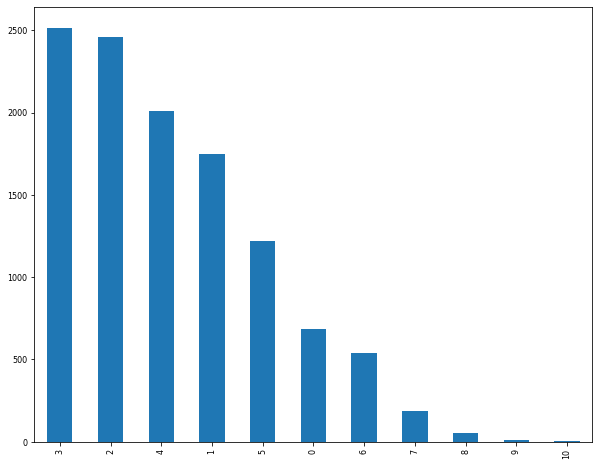

In [161]:
#home teams goals
plt.figure(figsize=(10,8))
df['home_goals'].value_counts().plot(kind='bar', fontsize = 8)

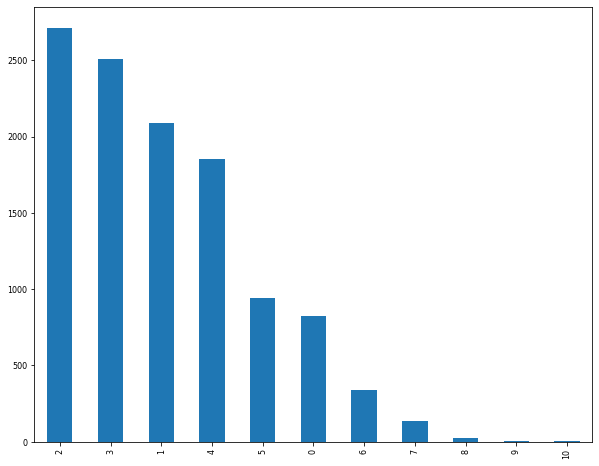

In [155]:
#away teams goals
plt.figure(figsize=(10,8))
df['away_goals'].value_counts().plot(kind='bar', fontsize = 8)

From these graphs you can tell the goals per home versus away teams is not too different. Although this seems like a trend that goes against home ice advantage, you can also tell goals do not come very often as the lower scores are much greater in amount.

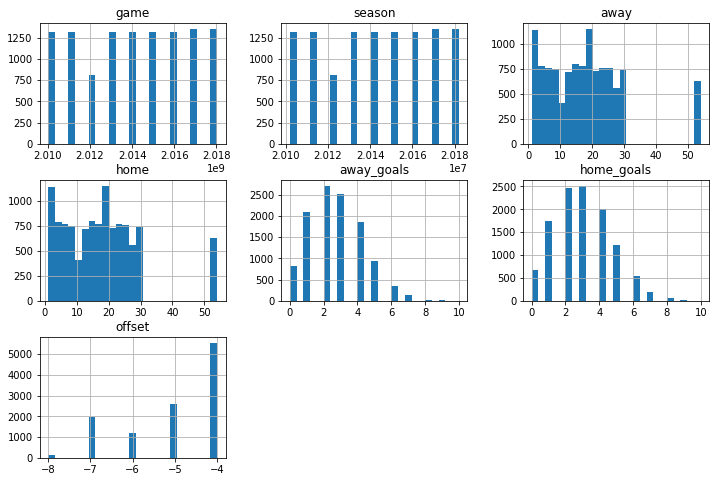

In [168]:
#creating a dataframe for numerical data
df.hist(bins=25, figsize=(12,8))
plt.show()

The above data is helping to explain the same concept that the home goals are more swayed to the higher number but not significantly by any means.

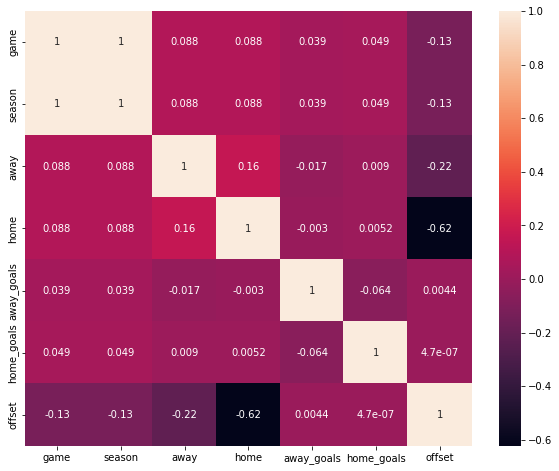

In [169]:
#correlations between the data with a correlation matrix
corrMatrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Unfortunately, based on this matrix I can see that not many other factors in this data set have much of a correlation with home or away goals.

In [172]:
#I want to test only correlations with home goals
corrMatrix["home_goals"].sort_values(ascending=False)

home_goals    1.000000e+00
season        4.866006e-02
game          4.863698e-02
away          8.991123e-03
home          5.205296e-03
offset        4.700806e-07
away_goals   -6.407065e-02
Name: home_goals, dtype: float64

Unable to see a strong correlation matching any results I am trying to gain in this project. Perhaps a variable like health would show a much greater correlation with goals at home.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c5c4e390>,
      dtype=object)

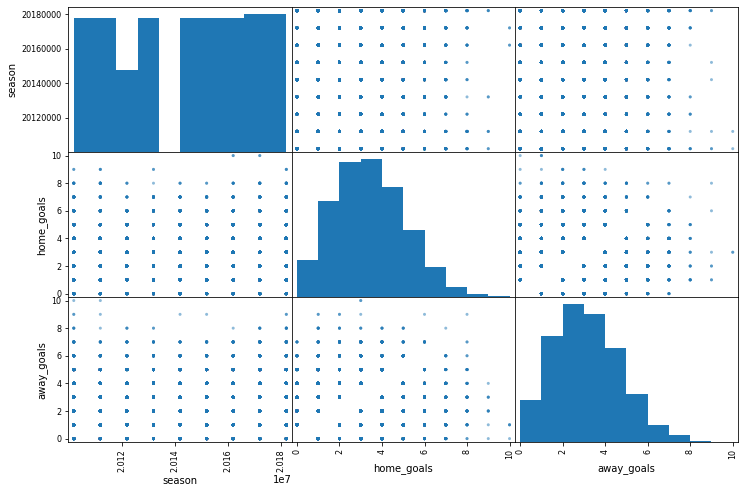

In [186]:
#comparing different factors
from pandas.plotting import scatter_matrix

attributes = ['season', 'home_goals', 'away_goals']
scatter_matrix(df[attributes], figsize=(12,8))

This was not very clear as well on how the relationship is between the home and away goals over time each sason.

Now I will start looking at the outcome of the games compared to the playoff or regular season.

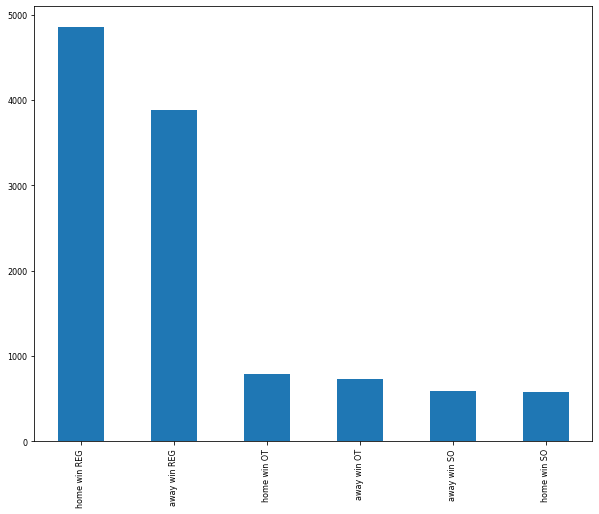

In [187]:
plt.figure(figsize=(10,8))
df['outcome'].value_counts().plot(kind='bar', fontsize = 8)

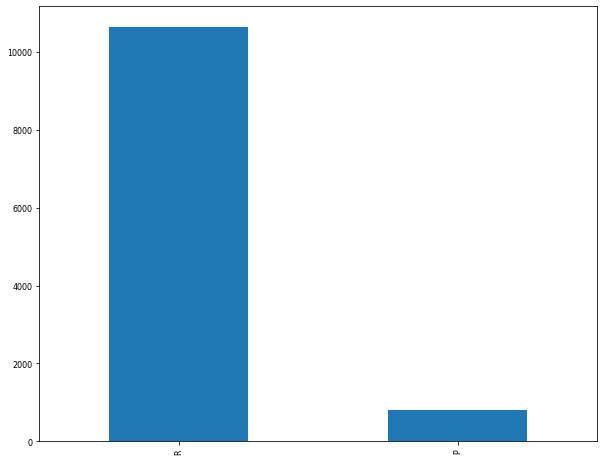

In [188]:
plt.figure(figsize=(10,8))
df['type'].value_counts().plot(kind='bar', fontsize = 8)

When looking at the outcome graph, I gathered strong information that home wins in regulation had the clear highest amount concluding that home advantage would be important. However, when I looked towards the lower end of the graph, I saw that the only outcome that away teams are better in is shootout victories. This can tell a lot due to how intense games can be near the end but the home crowd may not be helping as much as expected. Next in the other graph just shows how many wins came the regular season versus playoffs. The P is much less showing that this data came a lot from regular season scores making the argument for playoff home advantage not as strong. 

In [197]:
#deleting missing data? Cannot remove subset "starting"
df.dropna(subset=["starting"])
df.isna().sum()

game            0
season          0
type            0
date            0
time            0
away            0
home            0
away_goals      0
home_goals      0
outcome         0
starting      294
venue           0
link            0
location        0
offset          0
timezone        0
dtype: int64

In [205]:
sub_df = pd.DataFrame(df[['season', 'outcome', 'type', 'venue' ]])
sub_df.head()

,season,outcome,type,venue
0,20112012,home win OT,P,Wells Fargo Center
1,20112012,away win REG,P,Wells Fargo Center
2,20112012,home win OT,P,Prudential Center
3,20112012,home win REG,P,Prudential Center
4,20112012,away win REG,P,Wells Fargo Center


In [206]:
sub_df.isna().sum()

season     0
outcome    0
type       0
venue      0
dtype: int64

I do not see any real correlation between the location of the game without taking into account the traveling for the away teams.

In [208]:
#df_SI never created, Error creating it so code not useful
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['home_goals', 'away_goals', 'season', 'offset']
df_scaled.head()

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


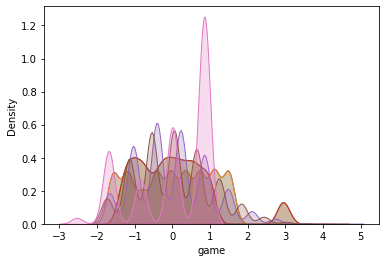

In [215]:
normalized_df = (df-df.mean())/df.std()
for col in df:
    sns.kdeplot(normalized_df[col], shade=True)

The last conclusion I am going to make is from the chart above normalizing the data. Most of the data is centered around the 1 due to the unwanted data in the set. The low ends near the 5 and -3 just show the difference in goals between the home and away teams which is clearly close on average.

From my research I could determine that home advantage does play a great impact in most playoff games. The higher amount of games won by the away teams in a shootout is not relevant to my question because in the playoffs no teams ever partake in a shootout. This shows even more that home advantage is true because teams will try more in playoffs so with away teams only winning more in shootouts,they do not win much in playoffs.